In [6]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from torchvision import transforms as T
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from src.model.classifier import classifier, load_classifier

### **GradCAM with BYOL**

Loading BYOL based model weights

In [37]:
BYOL_model = classifier(
    backbone="resnet18",
    weights_path="checkpoints/byol/byol_2022-03-13-12-51-30/weights/byol_resnet18_epoch_0_loss_0.0323.pth",
    freeze=False, # must be set to False, since GradCAM requires gradient
    n_classes=0
)

Getting backbone resnet18
Loading backbone weights from checkpoints/byol/byol_2022-03-13-12-51-30/weights/byol_resnet18_epoch_0_loss_0.0323.pth
Setting weights to backbone
Setting number of classes to predict to 0.


Setting and loading image

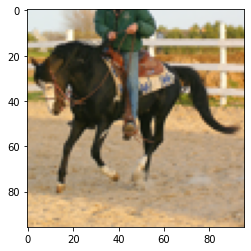

In [38]:
image_path = "data/stl10_test/test/0_7.png"
rgb_img = Image.open(image_path)
plt.imshow(rgb_img)

Defining torch transformations

In [39]:
transform = T.Compose([
    T.Resize(size=96),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

Preparing tensor for model

In [40]:
tensor_img = transform(rgb_img)
tensor_img = torch.unsqueeze(tensor_img, 0)
print(tensor_img.shape)

torch.Size([1, 3, 96, 96])


Setting target layers + GradCAM

In [41]:
target_layers = [BYOL_model.layer4[-1]]
gradcam = GradCAM(
    model=BYOL_model,
    target_layers=target_layers,
    use_cuda=False
)

Calling GradCAM

In [42]:
grayscale_cam = gradcam(
    input_tensor=tensor_img,
    targets=None
)

Plotting grayscal cam of the input image

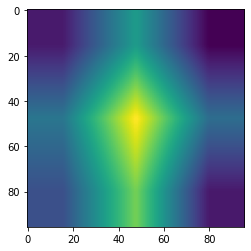

In [44]:
plt.imshow(grayscale_cam[0, :])

Applying GradCAM mask to image

In [47]:
# rgb_img to [0, 1]
rgb_img = np.array(rgb_img) / 255.
output = show_cam_on_image(
    img=rgb_img,
    mask=grayscale_cam[0, :],
    use_rgb=True
)

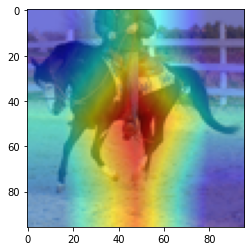

In [48]:
plt.imshow(output)